In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

final_states = pd.read_pickle('/home/jakob/Project_MayaSim/Python/output_data/X9_stability_analysis/results/all_final_states.pkl')
print(final_states.index.levels)

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'seaborn'

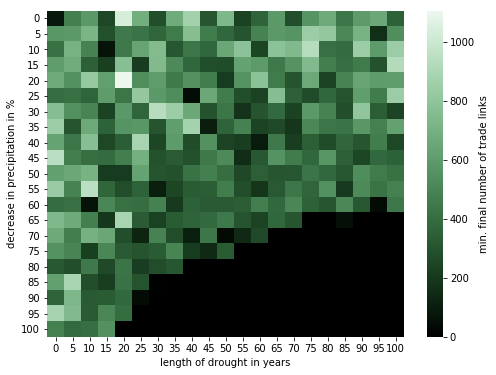

In [4]:
mean_data = final_states.groupby(level=[0, 1, 2, 4]).min().unstack('d_length')
mean_data.columns = mean_data.columns.droplevel()
mean_data.head()

pylab.rcParams['figure.figsize'] = (8, 6)

fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.heatmap(mean_data.xs(level=['r_trade', 'observables'], key=[8000, 'final trade links']).astype('int'), 
            fmt="d", 
            ax=ax,
            cmap=cmap,
            cbar_kws={'label': 'min. final number of trade links'}
           )
ax.set_ylabel('decrease in precipitation in %')
ax.set_xlabel('length of drought in years')

fig.savefig('stability_analysis_plot', transparent=True, dpi=200)

Caption: Average population after recovery period resulting from a drought event of given length and decrease in precipitation.

In [10]:
trj_data = pd.read_pickle('/home/jakob/Project_MayaSim/Python/output_data/test_output/X9_stability_analysis/results/all_trajectories.pkl')

In [11]:
for key in trj_data.keys():
    print(trj_data[key].columns)

Index(['trajectory_list', 'trajectory_list', 'trajectory_list'], dtype='object', name='key')
Index(['trajectory_list', 'trajectory_list', 'trajectory_list'], dtype='object', name='key')
Index(['trajectory_list', 'trajectory_list', 'trajectory_list'], dtype='object', name='key')


In [12]:
trj_data.plot()

TypeError: Empty 'DataFrame': no numeric data to plot